In [22]:
import matplotlib.pyplot as plt
import json
import numpy as np
summay_dir = r"/home/lab2/shahar/cluster_dirs/vcf/hgdp/classes/summary/"
windows_dir = r"/home/lab2/shahar/cluster_dirs/vcf/hgdp/classes/windows/"
window_to_snps_path =  windows_dir + 'number_of_windows_per_class.txt'
window_size_path = windows_dir + 'window_size.txt'
mac_min_range = 2
mac_max_range = 18
maf_min_range = 1
maf_max_range = 49
mac_class_names = [f'mac_{i}' for i in range(mac_min_range, mac_max_range+1)]
maf_class_names = [f'maf_{i / 100}' for i in range(maf_min_range, maf_max_range+1)]

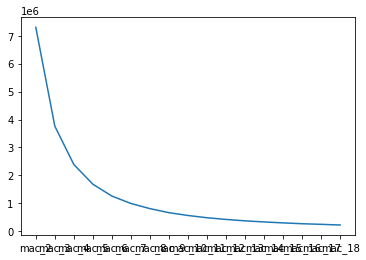

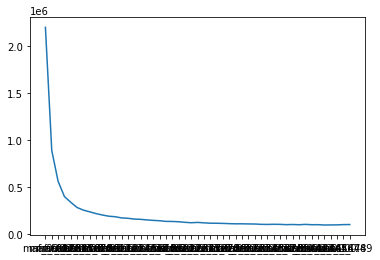

<Figure size 432x288 with 0 Axes>

In [23]:
with open(window_to_snps_path) as f:
    windows2count = json.load(f)
with open(window_size_path, 'r') as f:
    window_size = int(f.readline())
num_of_snps = []
for mac_maf in ['mac', 'maf']:
    is_mac = mac_maf == 'mac'
    min_range = mac_min_range if is_mac else maf_min_range
    max_range = mac_max_range if is_mac else maf_max_range
    for val in range(min_range, max_range+1):
        # in maf we take 0.x
        if not is_mac:
            val = f'{val * 1.0/100}'
        class_name = f'{mac_maf}_{val}'
        num_of_snps.append(int(windows2count[class_name]) * window_size)
    class_names = mac_class_names if is_mac else maf_class_names
    plt.plot(class_names, num_of_snps)
    plt.xticks(rotation=90)
    plt.savefig(f'{summay_dir}num_of_snps/{mac_maf}.png')
    plt.clf()
    num_of_snps = []